## Imports

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np
import pandas as pd
from raptcr.hashing import TCRDistEmbedder
import seaborn as sns
from umap import UMAP

# Set directory
os.chdir('path_to_your_dir')

/var/folders/h1/5mmv2z5n7xz9rwls3g_gr7580000gn/T/ipykernel_1197/2113519049.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/sofiegielis/miniconda3/envs/new_raptcr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Reading TCRex data

In [2]:
df = pd.read_csv('./data/final/unique_CDR3s.tsv', 
                 sep=',')

### Create CDR3 vectors

Each CDR3 is embedded as a vector of fixed length. The Euclidean distance between vectors of two TCRs equals their TCRdist score. In contrast to the varying-length strings, these vectors can be used with UMAP.

In [3]:
# CDR3 embedding without V genes
tcrdist = TCRDistEmbedder(full_tcr = False).fit()
tcrdist_embedding = tcrdist.transform(df)


/Users/sofiegielis/miniconda3/envs/new_raptcr/lib/python3.10/site-packages/raptcr/constants/preprocessing.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  L = len(cdrs[0])


In [4]:
# Add colors to df
#https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2388CCEE-%23DDCC77-%23882255-%23A9A9A9-%23c255f5
colors = {'HTTDPSFLGRY':'#332288',
          'NLVPMVATV':'#117733',
          'GILGFVFTL':'#88CCEE',
          #'FLNGSCGSV':'#882255',
          #'LPRRSGAAGA':'#C255F5',
          'Other':'#A9A9A9'}

df['color'] = df['epitope'].apply(lambda x: colors[x] if x in list(colors.keys()) else '#A9A9A9')
df['epitope'] = df['epitope'].apply(lambda x: x if x in list(colors.keys()) else 'Other' )
df = df.sort_values(by='epitope', ascending=False)
df

junction_aa     v_call    epitope     j_call    color
0        CAAADEEIGNQPQHF  TRBV10-03      Other  TRBJ01-05  #A9A9A9
25633  CASSQEGGGGPTDTQYF  TRBV04-01      Other  TRBJ02-03  #A9A9A9
25627  CASSQEGGFRFREKLFF  TRBV03-01      Other  TRBJ01-04  #A9A9A9
25628    CASSQEGGGAFEQYF  TRBV04-02      Other  TRBJ02-07  #A9A9A9
25629   CASSQEGGGDGQPPHF  TRBV04-01      Other  TRBJ01-05  #A9A9A9
...                  ...        ...        ...        ...      ...
34599    CASSYRAPGHTEAFF  TRBV06-05  GILGFVFTL  TRBJ01-01  #88CCEE
11834    CASSIVGAAKNIQYF     TRBV19  GILGFVFTL  TRBJ02-04  #88CCEE
39562    CSAREIRDFAYEQYF  TRBV20-01  GILGFVFTL  TRBJ02-07  #88CCEE
39563    CSAREKGLNYNEQFF  TRBV20-01  GILGFVFTL  TRBJ02-01  #88CCEE
10619  CASSHPGQGITNEKLFF  TRBV03-01  GILGFVFTL  TRBJ01-04  #88CCEE

[42050 rows x 5 columns]

### UMAP plotting

In [5]:
fit = UMAP(n_neighbors=15, min_dist=0.8) 
coordinates = fit.fit_transform(tcrdist_embedding) 


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


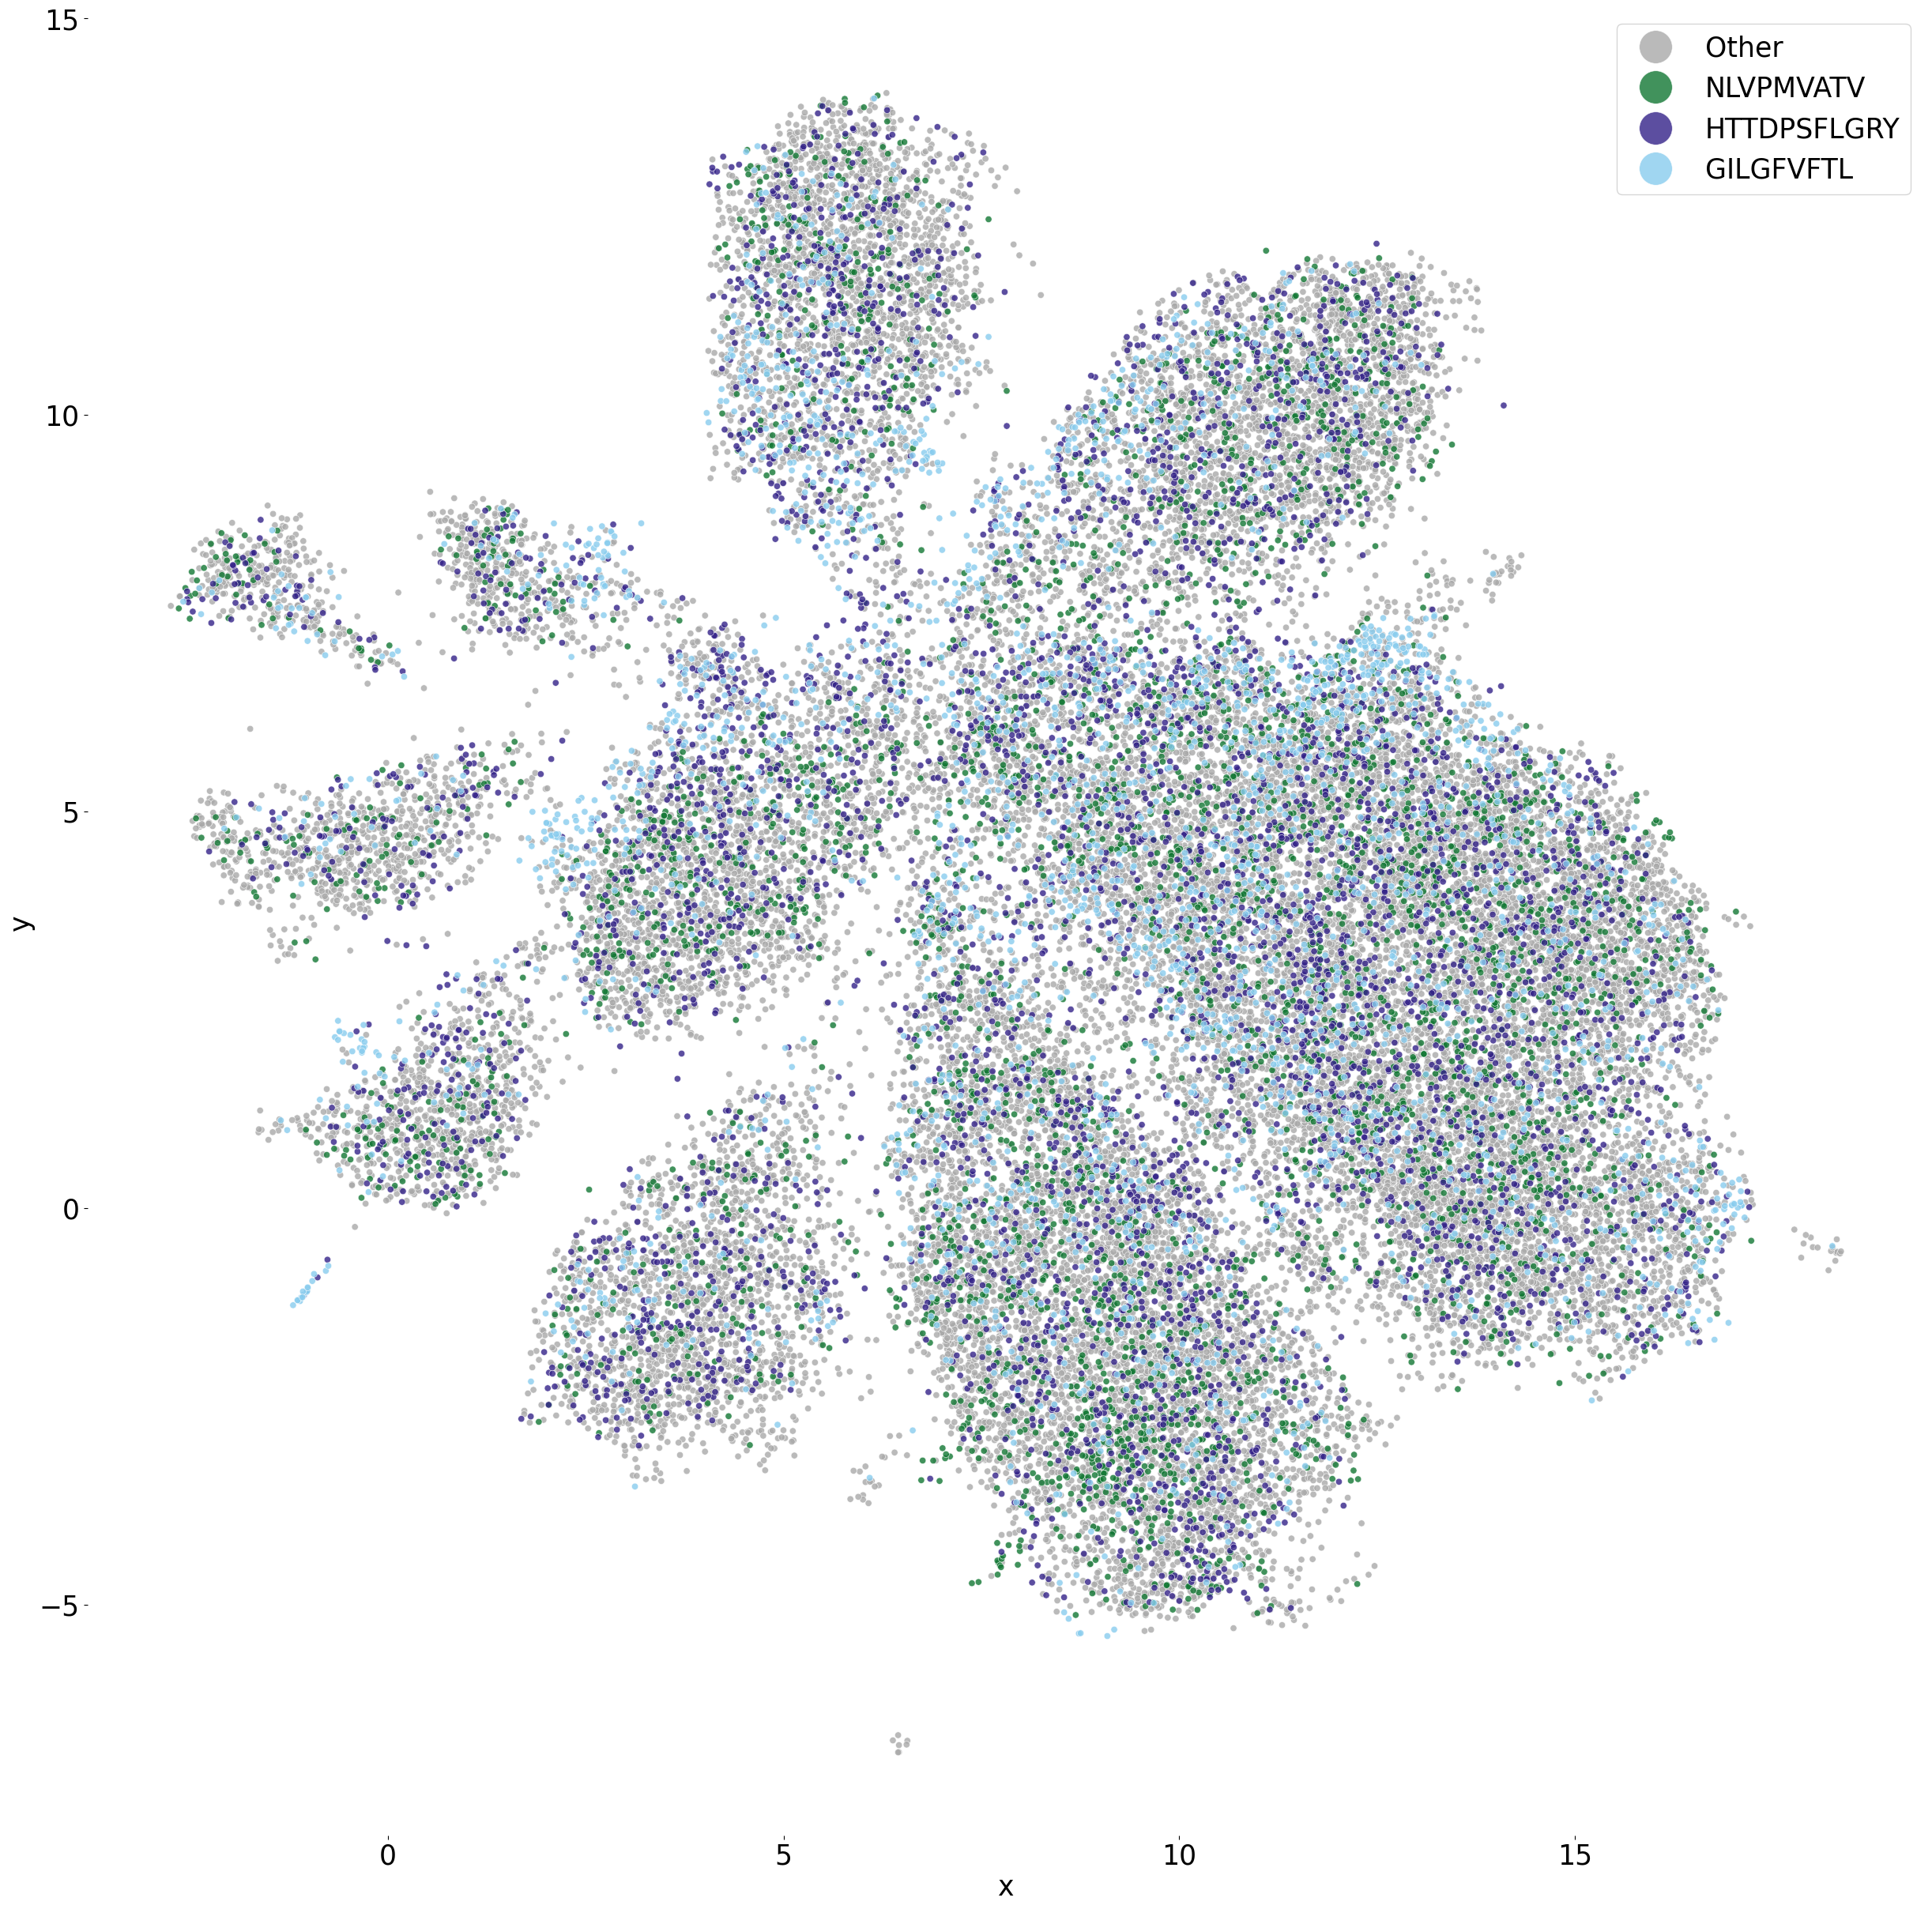

In [6]:
df["x"], df["y"] = zip(*coordinates)

fig_file =matplotlib.backends.backend_pdf.PdfPages('./figures/umap_tcrex/umap_3_epitopes.pdf')


fig, ax = plt.subplots(figsize=(30,30))
sns.scatterplot(
    data = df,
    x="x",
    y="y",
    alpha=0.8,
    ax=ax,
    hue="epitope",
    palette=colors
)

ax.set_xlabel('x',fontsize=25)
ax.set_ylabel('y',fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.legend(loc='best',fontsize=25,markerscale=5)
sns.despine(bottom=True, left=True)

fig_file.savefig(fig)
fig_file.close()